#### INTRODUCTION
> Stability of the Grid System

Electrical grids require a balance between electricity supply and demand in order to be stable. Conventional systems achieve this balance through demand-driven electricity production. For future grids with a high share of inflexible (i.e., renewable) energy sources, the concept of demand response is a promising solution. This implies changes in electricity consumption in relation to electricity price changes. In this work, we’ll build a binary classification model to predict if a grid is stable or unstable using the UCI Electrical Grid Stability Simulated dataset.


Attribute Information:

11 predictive attributes, 1 non-predictive(p1), 2 goal fields:
1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer.
2. p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4)
3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer.
4. stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real)
5. stabf: the stability label of the system (categorical: stable/unstable)

> Aim of the project

1. Use supervised Classification machine learning model to train and test stable and unstable of the system
2. perform a Hyperparameter tunning using RandomizedSearchCV

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [251]:
df=pd.read_csv('Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [252]:
df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [253]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [254]:
df.duplicated().sum()

0

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [256]:
df1=df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [257]:
# convert the target variable to 0 and 1
df1['stabf']=df1['stabf'].map({'unstable':1,'stable':0})
df1['stabf'].value_counts()

1    6380
0    3620
Name: stabf, dtype: int64

In [258]:
df1.corr()['stabf'].sort_values(ascending=False).index[1:6]

Index(['stab', 'tau2', 'tau4', 'tau3', 'tau1'], dtype='object')

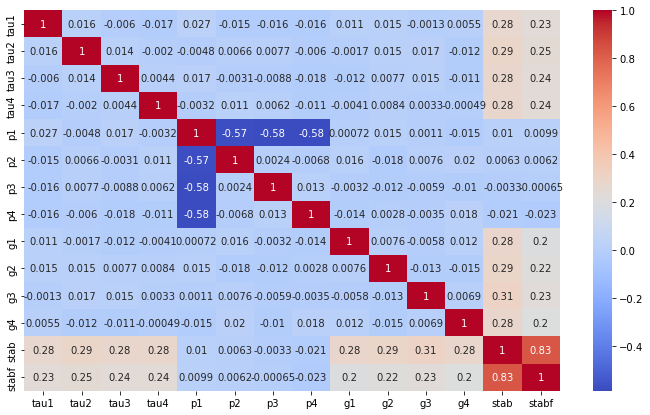

In [259]:
plt.figure(figsize=(12,7))
sb.heatmap(df1.corr(),cmap='coolwarm',annot=True);

Looking at the heatmap above the correlation of other independent variable with the target variable is not too strong

In [260]:
df1=df1.drop(columns=['stab'])

In [261]:
target=df1['stabf']
df_data=df1.drop(columns=['stabf'])

In [262]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test=train_test_split(df_data,target,test_size=.2,random_state=1)

In [263]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

In [264]:
# import imblearn
# from imblearn.over_sampling import SMOTE
# smote= SMOTE(random_state=1)
# x_train_balance,y_balance= smote.fit_resample(X_train,Y_train)
# x_train_balance.shape, y_balance.shape


In [265]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
normalised_train_df=scaler.fit_transform(X_train,Y_train)
normalised_train_df= pd.DataFrame(normalised_train_df)

In [266]:
x_test=X_test.reset_index(drop=True)
normalised_test_df=scaler.transform(x_test)
normalised_test_df= pd.DataFrame(normalised_test_df)

In [267]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(normalised_train_df, Y_train)
#returns
LogisticRegression(C= 1.0 , class_weight= None , dual= False , fit_intercept= True ,
 intercept_scaling= 1 , l1_ratio= None , max_iter= 100 ,
 multi_class= 'auto' , n_jobs= None , penalty= 'l2' ,
 random_state= None , solver= 'lbfgs' , tol= 0.0001 , verbose= 0 ,
 warm_start= False ) 

LogisticRegression()

In [268]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(log_reg, normalised_train_df,Y_train, cv=5, scoring='f1_macro')
score

array([0.8049015 , 0.80345987, 0.80785034, 0.79645688, 0.7835111 ])

In [269]:
Y_test.shape,x_test.shape, normalised_test_df.shape

((2000,), (2000, 12), (2000, 12))

In [270]:
from sklearn.metrics import recall_score, accuracy_score, precision_score,f1_score,confusion_matrix
new_predictions=log_reg.predict(normalised_test_df)
cnf_mat=confusion_matrix(y_true=Y_test,y_pred=new_predictions)
cnf_mat

array([[ 494,  218],
       [ 174, 1114]], dtype=int64)

In [271]:
accuracy=accuracy_score(y_true=Y_test,y_pred=new_predictions)
print('Accuracy: {}' .format(round(accuracy *100),2))   

Accuracy: 80


In [272]:
precision=precision_score(y_true=Y_test,y_pred=new_predictions)
print('precission: {}' .format(round(precision *100),2))

precission: 84


In [273]:
recall=recall_score(y_true=Y_test,y_pred=new_predictions)
print('Recall: {}' .format(round(recall *100),2))

Recall: 86


In [274]:
f1=f1_score(y_true=Y_test,y_pred=new_predictions)
print('f1: {}' .format(round(f1 *100),2))

f1: 85


In [275]:
# import all liberary needed
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

m_random=RandomForestClassifier()
extra=ExtraTreesClassifier()

In [276]:
m_random.fit(normalised_train_df,Y_train)

RandomForestClassifier()

In [277]:
# cross val score of the Random model
score=cross_val_score(m_random,normalised_train_df,Y_train,cv=5,scoring='f1_macro')
score

array([0.90093493, 0.9100645 , 0.90949114, 0.9010989 , 0.92202129])

In [278]:
from sklearn.metrics import recall_score, accuracy_score, precision_score,f1_score,confusion_matrix
new_predictions=m_random.predict(normalised_test_df)
cnf_mat1=confusion_matrix(y_true=Y_test,y_pred=new_predictions)
cnf_mat1

array([[ 619,   93],
       [  74, 1214]], dtype=int64)

In [279]:
accuracy1=accuracy_score(y_true=Y_test,y_pred=new_predictions)
print('Accuracy: {}' .format(round(accuracy1,4)))  

Accuracy: 0.9165


In [280]:
precision1=precision_score(y_true=Y_test,y_pred=new_predictions)
print('precission: {}' .format(round(precision1 *100),2))

precission: 93


In [281]:
recall1=recall_score(y_true=Y_test,y_pred=new_predictions)
print('Recall: {}' .format(round(recall1 *100),2))

Recall: 94


In [282]:
f1_s=f1_score(y_true=Y_test,y_pred=new_predictions,)
print('f1: {}' .format(round(f1_s *100),2))

f1: 94


In [283]:
# get for ExtraTreesClassifier()
extra.fit(normalised_train_df,Y_train)

ExtraTreesClassifier()

In [284]:
score=cross_val_score(extra,normalised_train_df,Y_train,cv=5,scoring='f1_macro')
score

array([0.90898844, 0.91710317, 0.91965368, 0.9027322 , 0.91491536])

In [285]:
from sklearn.metrics import recall_score, accuracy_score, precision_score,f1_score,confusion_matrix
new_predictions=extra.predict(normalised_test_df)
cnf_mat1=confusion_matrix(y_true=Y_test,y_pred=new_predictions)
cnf_mat1

array([[ 607,  105],
       [  32, 1256]], dtype=int64)

In [286]:
accuracy_1=accuracy_score(y_true=Y_test,y_pred=new_predictions)
print('Accuracy of ExtraTreeClassifier: {}' .format(round(accuracy_1,4))) 

Accuracy of ExtraTreeClassifier: 0.9315


In [289]:
import xgboost as xg
import lightgbm as lt

In [290]:
#x_train,x_test,y_train,y_test=train_test_split(df_data,target,test_size=.2,random_state=1)
model=lt.LGBMClassifier()
model.fit(normalised_train_df,Y_train)

LGBMClassifier()

In [291]:
score=cross_val_score(model,normalised_train_df,Y_train,cv=5,scoring='f1_macro')
score

array([0.92843386, 0.94466058, 0.93147894, 0.92695545, 0.94360434])

In [292]:
from sklearn.metrics import recall_score, accuracy_score, precision_score,f1_score,confusion_matrix
new_predictions=model.predict(normalised_test_df)
cnf_mat1=confusion_matrix(y_true=Y_test,y_pred=new_predictions)
cnf_mat1

array([[ 641,   71],
       [  50, 1238]], dtype=int64)

In [293]:
accuracy2=accuracy_score(y_true=Y_test,y_pred=new_predictions)
print('Accuracy of LGBM: {}' .format(round(accuracy2,4)) ) 

Accuracy of LGBM: 0.9395


In [294]:
model2=xg.XGBClassifier()
model2.fit(normalised_train_df,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [295]:
from sklearn.metrics import recall_score, accuracy_score, precision_score,f1_score,confusion_matrix
new_predictions=model2.predict(normalised_test_df)
cnf_mat1=confusion_matrix(y_true=Y_test,y_pred=new_predictions)
cnf_mat1

array([[ 648,   64],
       [  45, 1243]], dtype=int64)

In [296]:
accuracy2=accuracy_score(y_true=Y_test,y_pred=new_predictions)
print('Accuracy: {}' .format(round(accuracy2,4)) )  

Accuracy: 0.9455


In [297]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 100)]
min_samples_split=[2,6,10] # minimum number to split node
min_samples_leaf=[1,3,4] # minimum sample number that can be stored in a leaf node
max_features=['auto']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
bootstrap=[True, False]

In [298]:
param_grid = {'n_estimators':n_estimators,'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,'max_features':max_features,
             'max_depth':max_depth, 'bootstrap':bootstrap}

In [299]:
from sklearn.model_selection import RandomizedSearchCV

estimator=ExtraTreesClassifier()
estim=RandomizedSearchCV(estimator,param_distributions=param_grid, n_iter = 10, 
                         verbose=1, random_state=1, n_jobs = -1,scoring='accuracy', cv=5)

In [300]:
estim.fit(normalised_train_df,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [10, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, 30, 30,
                                                         31, 32, 33, 34, 35, 36, ...]},
                   random_

In [301]:
print('Best Parameter:', estim.best_params_, '\n')

Best Parameter: {'n_estimators': 90, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': False} 



In [302]:
final_m=estim.best_estimator_

In [303]:
cross_val_score(final_m, normalised_test_df,Y_test,scoring='accuracy')

array([0.9   , 0.8825, 0.88  , 0.8575, 0.87  ])

In [305]:
new_predictions=final_m.predict(normalised_test_df)
accuracy_1=accuracy_score(y_true=Y_test,y_pred=new_predictions)
print('Accuracy of ExtraTreeClassifier after tunning: {}' .format(round(accuracy_1,4))) 

Accuracy of ExtraTreeClassifier after tunning: 0.923


The accuracy score reduces after tunning